<a href="https://colab.research.google.com/github/Prattoypaul/myml/blob/main/flower191_15_2540.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2
import PIL.Image as Image
import os
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
img_shape=(224,224)
classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=img_shape+(3,))
])
classifier.trainable=False

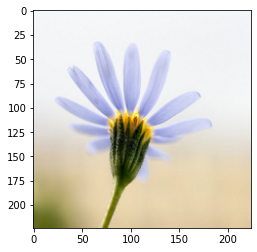

In [5]:
image=Image.open("gdrive/MyDrive/Colab Notebooks/new_project_flower/flower_photos/daisy/19865728236_a62f8f445b_n.jpg").resize(img_shape)
plt.imshow(image)

In [6]:
flower=np.array(image)/255
flower=flower[np.newaxis, ...]

result=classifier.predict(flower)
Max_result=np.argmax(result)

image_lables=[]
with open("gdrive/MyDrive/Colab Notebooks/new_project_flower/flower_photos/LICENSE.txt","r") as f:
  image_labels=f.read().splitlines()
image_labels[Max_result]

'dandelion/20456824132_b1c8fbfa41_m.jpg CC-BY by Mathias Wennergren - https://www.flickr.com/photos/mattishorna/20456824132/'

In [7]:
flower_folder=r"gdrive/MyDrive/Colab Notebooks/new_project_flower/flower_photos"
catagories=['daisy','dandelion','roses','sunflowers','tulips',]

In [8]:
data=[]
for Catagories in catagories:
  Folder=os.path.join(flower_folder,Catagories)
  label=catagories.index(Catagories)

  for img in os.listdir(Folder):
    image=os.path.join(Folder,img)
    image_arr=cv2.imread(image)
    image_arr=cv2.resize(image_arr,img_shape)
    data.append([image_arr,label])


In [9]:
data

[[array([[[42, 21, 21],
          [43, 21, 23],
          [43, 20, 24],
          ...,
          [59, 32, 28],
          [58, 31, 27],
          [58, 31, 27]],
  
         [[42, 21, 21],
          [43, 21, 23],
          [43, 20, 24],
          ...,
          [60, 34, 28],
          [59, 32, 28],
          [58, 31, 27]],
  
         [[42, 20, 22],
          [43, 21, 23],
          [43, 21, 23],
          ...,
          [61, 35, 29],
          [60, 34, 28],
          [59, 33, 27]],
  
         ...,
  
         [[71, 59, 55],
          [70, 60, 57],
          [71, 61, 61],
          ...,
          [63, 80, 57],
          [63, 78, 56],
          [61, 73, 53]],
  
         [[69, 57, 53],
          [70, 57, 56],
          [69, 59, 59],
          ...,
          [67, 84, 61],
          [67, 81, 59],
          [64, 76, 56]],
  
         [[70, 55, 52],
          [69, 57, 55],
          [68, 58, 58],
          ...,
          [74, 90, 67],
          [73, 88, 66],
          [71, 83, 63]]], dtype=u

In [10]:
import random
random.shuffle(data)
x=[]
y=[]
for feature,label in data :
  x.append(feature)
  y.append(label)

x=np.array(x)
y=np.array(y)

x=x/255
x

array([[[[0.90980392, 0.90980392, 0.90980392],
         [0.90980392, 0.90980392, 0.90980392],
         [0.90980392, 0.90980392, 0.90980392],
         ...,
         [0.69019608, 0.71764706, 0.70588235],
         [0.74117647, 0.76078431, 0.75686275],
         [0.74901961, 0.76078431, 0.76078431]],

        [[0.90980392, 0.90980392, 0.90980392],
         [0.90980392, 0.90980392, 0.90980392],
         [0.91372549, 0.91372549, 0.91372549],
         ...,
         [0.69803922, 0.7254902 , 0.71372549],
         [0.74117647, 0.76078431, 0.75686275],
         [0.74901961, 0.76862745, 0.76862745]],

        [[0.90980392, 0.90980392, 0.90980392],
         [0.91372549, 0.91372549, 0.91372549],
         [0.91372549, 0.91372549, 0.91372549],
         ...,
         [0.70588235, 0.73333333, 0.72156863],
         [0.7372549 , 0.76078431, 0.76078431],
         [0.75686275, 0.77647059, 0.78039216]],

        ...,

        [[0.00784314, 0.11372549, 0.0627451 ],
         [0.        , 0.10196078, 0.04705882]

In [12]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [11]:
previous_model=hub.KerasLayer(
    "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4",
    input_shape=img_shape+(3,),
    trainable=False
)

In [14]:
number_of_flower=5
model = tf.keras.Sequential([
                 previous_model,
                 tf.keras.layers.Dense(number_of_flower)          
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [15]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)
model.fit(xtrain,ytrain,epochs=5)

Epoch 1/5
81/81 [==============================] - 86s 1s/step - loss: 0.8049 - acc: 0.7014
Epoch 2/5
81/81 [==============================] - 83s 1s/step - loss: 0.4184 - acc: 0.8536
Epoch 3/5
81/81 [==============================] - 83s 1s/step - loss: 0.3335 - acc: 0.8852
Epoch 4/5
81/81 [==============================] - 81s 1s/step - loss: 0.2729 - acc: 0.9116
Epoch 5/5
81/81 [==============================] - 82s 1s/step - loss: 0.2359 - acc: 0.9311


In [16]:
model.evaluate(xtest,ytest)

35/35 [==============================] - 39s 1s/step - loss: 0.3425 - acc: 0.8774


[0.34247905015945435, 0.8773841857910156]